# Boston Bike Share Data
By Alex Pham, Yucheng (Peter) Peng

This project uses data from [Blue Bikes](https://www.bluebikes.com/system-data), the bike sharing program in Boston. The website contains all trip histories for customers over all time. Generally, interesting questions to consider looking into relate to what the customer-base looks like:

* Who uses the bikes for commuting to work vs fun? Can you determine where each of these happens most? What are the attributes of trips taken during the week vs weekend? What does usage look like across the seasons?
* Profile the users by trip duration and trip distance (between stations). How much can we understand about what the person did on the trip just from know the beginning and end.
* "Is bike share use preventing drunk driving?". That is, can you tell if people use bikes to going out to bars and restaurants? When might this happen? Who might be using the bikes for these activities? While this is at heart a casual question, investigating associations is the first step toward answering the question.
* For all of the above questions, what is the gender/age of the bike share users doing these activity? Can you infer anything about who is doing what?

### Getting the data

The data is available on [this website](https://s3.amazonaws.com/hubway-data/index.html). You should use trip data between (and including) 2018-05 to 2019-03. 

* Use the fact that `pd.read_csv` can read in both `zip` files, as well as urls.
* Once the data is downloaded, write it to a local file so you don't have to download the data repeatedly.

### Cleaning the data and descriptive statistics

* Clean the data.
* Understand the data in ways relevant to your question, using univariate and bivariate analysis of the data, as well as aggregations.

*Tips:*
* To measure distances between two lat/long pairs, use [the haversine distance formula](https://gist.github.com/rochacbruno/2883505) -- in the comments, someone also provides a Numpy-vectorized formula.
* If you'd like to try plotting your statistics on a map, try [Folium](https://blog.dominodatalab.com/creating-interactive-crime-maps-with-folium/).

### Missingness

While the dataset has no empty entries, both the `age` and `birth year` columns certainly contain missing data, as they are self-reported. You must:

1. Figure out which rows likely contain "missing" data for `age` and `birth year` and blank them out.
2. Assess the missingness of `age` and/or `birth year`.

### Hypothesis Test

Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.


---
# Summary of Findings

## Introduction
---
We chose the Blue Bikes data set.
<img src="data/bikes_table.png"/>

**The question we choose to investigate was**...

* What does the commute and activity of users, that were born in 1969 and chose "Other" as their gender, look like?
    - What are some popular start/end stations?
        - Why could they be so popular?
        - How does the popularity of those stations change depending on weekdays? What about weekends?
 </div>



### Results of Cleaning and EDA:
---


**Before exploring the data set**, the two questions we chose to explore about it are.. 
* Who uses the bikes for commuting to work vs fun? Can you determine where each of these happens most? What are the attributes of trips taken during the week vs weekend? What does usage look like across the seasons?
* Profile the users by trip duration and trip distance (between stations). How much can we understand about what the person did on the trip just from know the beginning and end.



**While exploring the data set**, we cleaned and then analyzed the data via **univariate**, **bivariate**, and found **interesting aggregates**.

**<font color=green>Cleaning the Data</font>**

For the most part, the data was very clean. The only things we did to clean were
* Convert the starttime column from an object to type datetime
* Convert the stoptime column from an object to type datetime
* Add in an age column based off of birth years by subtracting the column from 2019
* Created age groups based off of the added ages



**<font color=green>Univariate Analysis</font>**

* **Firstly**, we went in a direction inspired by the prior two questions we chose. Since we wanted to somehow profile users into some distinct groups, the first place we decided to look at was ages, which we could indirectly examine through plotting birth years.

<div style="float: left">
    <img src="data/birth_years.png" style = "width: 400px;"/>
</div>

   In this histogram, we noticed a strikingly abnormal spike in the proportion of users born in some bin within the 1960's. We checked the value counts of the birth years column and saw that it was due to the year **1969 having the highest amount of counts at 226,530**, while the following value counts were all near 86,000! 

<div style = "float: left">
<br>
 
* **Secondly**, to further explore potential ways of profiling people, we decided to look at gender. We noticed the gender columns had 0,1, and 2 only.  We cleaned up the gender column since it had both string and int versions of the numbers 0, 1, and 2. By looking at the value counts, 1 and 2 were most likely male and female, due to them being the larger of maark II.

<div style = "float: left">
<br>
 
* **Thirdly**, since one of our initial questions tasked us with profiling based on trip duration, we decided to investigate the distribution of trip durations. We did this by plotting a histogram of the values converted to minutes.

<div style="float: left">
    <img src="data/full_trip.png" style = "width: 400px;"/>
</div>

This histogram has bins that contain a majority of the data. The bins were adjusted due to outliers causing the bin range to render the histogram impractical to read. The red dot is the plotted mean of all trip duration values. When looking at values sorted in descending order, we noticed some ridiculous outliers, such as a **trip duration** equivalent to **107 days long**. 

</div>


<div style = "float: left">
<br>
 
<div style="float: left">
    <img src="data/lower_trip.png" style = "width: 400px;"/>
</div>

 In order to see how strongly these outliers skewed our distribution, we decided to plot another histogram in which it contained the lower 75% of the trip duration values, and plotted the corresponding mean in red, with the previous mean in blue. Between these distributions, the population mean was 27 while the lower 75% distribution had a mean of 9, a **reduction of 66%**!

 </div> 
 
<div style = "float: left">
<br>
 
 
**We formed a new question**, in order to explore our findings further, by merging our two questions into one.

* What does the commute and activity of users, that were born in 1969 and chose "Other" as their gender, look like?
    - What are some popular start/end stations?
        - Why could they be so popular?
        - How does the popularity of of those stations change depending on weekdays? What about weekends?
 </div>       

**<font color=green>Bivariate Analysis</font>**

For our bivariate analysis:
* We examined the gender of those born in 1969
* We created a pivot table based on age and gender.
* We used Folio to plot the maps of all the stations.

**1969 Genders**

We looked at only people who were born in 1969, and then got the value counts. We noticed an insane amount of people that chose other as their gender(0). Of the 

**Pivot Table**

Here we decided to create a pivot table to see if we notice anything oddities within trip duration in relation to both gender and age groups. This table's values are the mean trip duration of the corresponding intersection of columnn and index.

<br>

<div style="float: left">
    <img src="data/age group.png" style = "width: 400px;"/>
</div>

What we noticed here was that the group we were interested in above, people with gender as 0 and age 1969, have a significantly higher average trip duration. This could suggest that there is further investigation to be had in this direction.

**Folio**

Each marker represents a station and has a size corresponding to the number of rides involving that station. *(Interact in the html file)*

<br>

<div>
    <img src="data/all_stations.png" style = "width: 1200px;"/>
</div>


The following map represents where those people who were born in 1969 and identify as nonbinary arrive on weekday's mornings from 7 to 9. The good portion of them ended up in college districts. (Interact in the html file)

<br>

<div>
    <img src="data/weekday_am.png" style = "width: 1200px;"/>
</div>


The following map represents where those people who were born in 1969 and identify as nonbinary arrive on weekend's evening after 8 (represented in red) and leave at midnight before 3 (represented in blue). The good portion of them ended up in financial district and surrounding streets with ample restrurants and bars. (Interact in the html file)

<br>

<div>
    <img src="data/weekend_am_pm.png" style = "width: 1200px;"/>
</div>

**<font color=green>Interesting Aggregates</font>**

**Who ended up in college the most?**

Here we analyze the number of trips that stopped in the major college districts (BU, MIT, Harvard, and Northeastern) by birth year. It seems that people born in 1969 tend to finish their trips in one of the colleges, which may indicate their identity as college students.
<br>

<div>
    <img src="data/end_in_college.png" style = "width: 1200px;"/>
</div>

### Results of Missingness:
---

### Results of Hypothesis Test
---


---

# Your Code Starts Here

In [7]:
%matplotlib inline
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plot

import folium
import json
from shapely.geometry import shape, Point

In [3]:
#Import junk you dont have to include
csvs = [
    'https://s3.amazonaws.com/hubway-data/201805-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201806-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201807-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201808-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201809-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201810-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201811-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201812-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201901-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201902-bluebikes-tripdata.zip',
    'https://s3.amazonaws.com/hubway-data/201903-bluebikes-tripdata.zip'
]
outfp = 'bluebikes-tripdata.csv'
if not os.path.exists(outfp):
    firstTime = True
    for csv in csvs:
        L = pd.read_csv(csv, dtype = str, chunksize=10000)
        for df in L:
        # for every 10000 rows, append to output
            df.to_csv(outfp, mode='a', index=False, header=firstTime)
            if firstTime:
                firstTime = False
bluebikes = pd.read_csv(outfp)

In [4]:
#This just makes all the outputted graphs high quality resolution
%config InlineBackend.figure_format ='retina'

In [152]:
#Found 1969 as most common year, followed by years with average ~86000
bluebikes['birth year'].value_counts(ascending=False)[:10]

1969    226530
1992     86983
1989     86293
1988     86209
1990     84626
1991     84216
1993     83499
1994     83257
1995     71536
1987     61823
Name: birth year, dtype: int64

Text(0.5, 1.0, 'Histogram of Birth Years (binsize=5)')

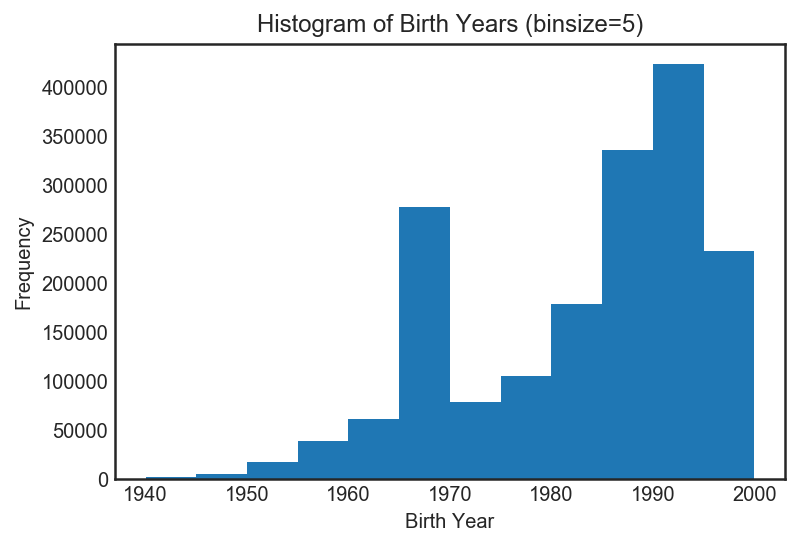

In [88]:
#Histogram of Birth Years
strange = bluebikes['birth year'].plot(kind='hist', bins=np.arange(1940, bluebikes['birth year'].max(), 5))
plot.xlabel('Birth Year')
plot.title('Histogram of Birth Years (binsize=5)')

# Exploration: Trip Duration Outliers?
* There's some very high values in the distribution for outliers?
    - How strongly is that skewing our data?

In [187]:
#Code to show the longest trip duration for a bike rental was 107 days
(bluebikes['tripduration'].value_counts().sort_index(ascending=False).index[0]/3600)/24

107.96942129629629

Text(0.5, 1.0, 'Histogam of Trip Durations Full 100%')

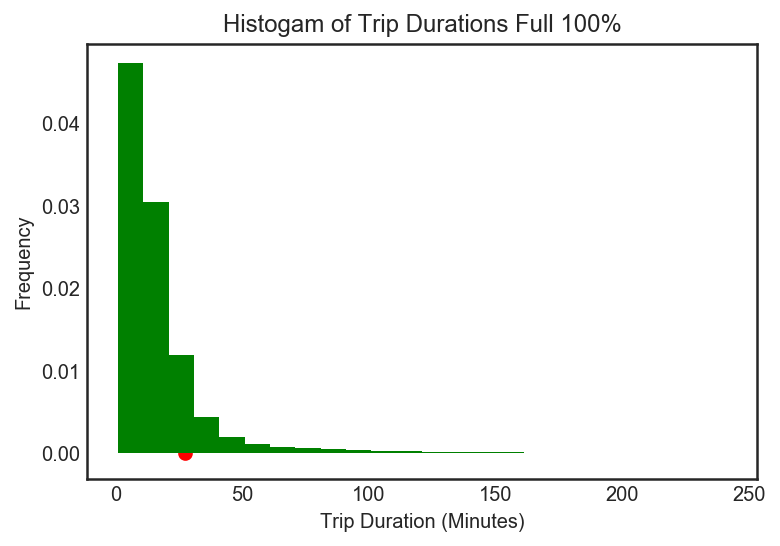

In [109]:
#Population
unfiltered = (bluebikes['tripduration']/60)
unfiltered.plot(kind='hist', density=True, bins =np.arange(int(unfiltered.min()), 250, 10), color = 'g')
plot.scatter((bluebikes['tripduration']/60).mean(), 0, color='red', s=40);
plot.xlabel('Trip Duration (Minutes)')
plot.title('Histogam of Trip Durations Full 100%')

Text(0.5, 1.0, 'Histogam of Trip Durations Lower 75%')

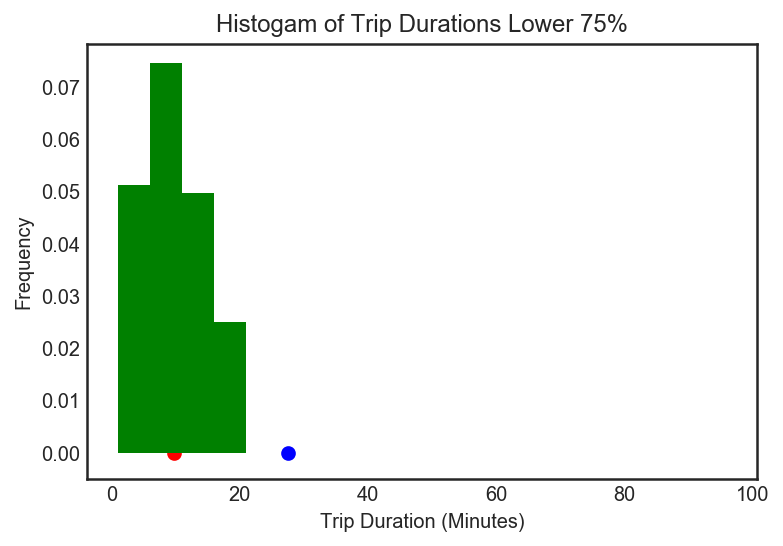

In [113]:
#Lower 75% of Population(Removes outliers)
filtered =(bluebikes[bluebikes['tripduration'] < bluebikes['tripduration'].describe()['75%']]['tripduration']/60)
filtered.plot(kind='hist', density=True, bins = np.arange(int(filtered.min()), 100, 5), color = 'g')
plot.scatter(filtered.mean(), 0, color='red', s=40);
plot.scatter(unfiltered.mean(), 0, color='blue', s=40);
plot.xlabel('Trip Duration (Minutes)')
plot.title('Histogam of Trip Durations Lower 75%')

In [216]:
#Looking at 1969 genders
gender_vals = bluebikes.loc[bluebikes['birth year'] == 1969]['gender'].value_counts()
proportion = a[0]/gender_vals.values.sum()
gender_vals, gender_vals.sum()

(0    211451
 1     12062
 2      3017
 Name: gender, dtype: int64, 226530)

In [199]:
#Pivot Table of age groups and gender, values are mean trip durations
bluebikes.pivot_table(values = 'tripduration', index = 'gender', columns = 'age group')

age group,Adult,Elderly,Middle-aged,Teen,Young Adult
gender,,,,,
0,1949.733813,797.339130,4923.439004,1145.924658,2782.661066
1,1133.359004,1077.229449,1026.288791,1413.484537,1094.963836
2,1501.612361,1686.171060,1167.548389,1966.968578,1487.523632


### Cleaning and EDA:
---

In [8]:
# add custom columns to improve readability
def toAge(x):
    if x < 21:
        return 'Teen'
    elif 21 <= x < 35:
        return 'Young Adult'
    elif 35 <= x < 50:
        return 'Adult'
    elif 50 <= x < 65:
        return 'Middle-aged'
    else:
        return 'Elderly'

# check if a station is in college
geo = os.path.join('data', 'geo.json')
with open(geo) as f:
    js = json.load(f)
    
def inCollege(long, lat):
    point = Point(long, lat)

    for feature in js['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point):
            return True
    return False

bluebikes['in college'] = bluebikes.apply(lambda x: inCollege(x['end station longitude'], x['end station latitude']), axis=1)
bluebikes['starttime'] = pd.to_datetime(bluebikes['starttime'])
bluebikes['stoptime'] = pd.to_datetime(bluebikes['stoptime'])
bluebikes['age'] = 2019 - bluebikes['birth year']
bluebikes['group'] = bluebikes['age'].apply(toAge)

In [15]:
weekday_am_act = bluebikes.loc[(bluebikes['gender'] == 0) & (bluebikes['age'] == 50)]\
                        .loc[(bluebikes['stoptime'].dt.hour > 6) & (bluebikes['stoptime'].dt.hour < 10)]\
                        .loc[bluebikes['stoptime'].dt.weekday < 5]\
                            ['end station name'].value_counts() # 5 - saturday

weekend_pm_act = bluebikes.loc[(bluebikes['gender'] == 0) & (bluebikes['age'] == 50)]\
                        .loc[(bluebikes['stoptime'].dt.hour > 19)]\
                        .loc[bluebikes['stoptime'].dt.weekday >= 4]\
                            ['end station name'].value_counts() # 5 - saturday

weekend_am_act = bluebikes.loc[(bluebikes['gender'] == 0) & (bluebikes['age'] == 50)]\
                        .loc[(bluebikes['starttime'].dt.hour < 4)]\
                        .loc[bluebikes['starttime'].dt.weekday >= 4]\
                            ['start station name'].value_counts() # 5 - saturday

In [17]:
# how many stations are on campus
on_campus_trips = bluebikes[bluebikes['in college']]
on_campus_stations = on_campus_trips['end station name'].unique()
len(on_campus_stations)

33

In [18]:
# how many overall stations there are
all_stations = bluebikes['end station name'].unique()
len(all_stations)

325

In [20]:
# make sure to optimize 'radius'! 200 is big enough!
# make sure to change output file name!

m = folium.Map(location=[42.361145, -71.057083], zoom_start=13)
#colleges = os.path.join('data', 'colleges.geojson')

for i in range(len(all_stations)):
    # map all stations in Boston
    
    x = bluebikes.loc[bluebikes['end station name'] == all_stations[i]]
    folium.CircleMarker(
        location=[x['end station latitude'].iloc[0], x['end station longitude'].iloc[0]],
        radius=len(x)/100,
        popup=all_stations[i] + '(' + str(len(x)) + ')',
        color='blue',
        fill_opacity=0.3
    ).add_to(m)
    """
    # map all on campus stations
    x = on_campus_trips.loc[on_campus_trips['end station name'] == on_campus_stations[i]].iloc[0]
    folium.CircleMarker(
        location=[x['end station latitude'], x['end station longitude']],
        radius=50,
        color='blue',
        fill_opacity=0.3
    ).add_to(m)
    
    # analyzing what those 50 year old nonbinary end up on weekdays from 7 to 9
    x = bluebikes.loc[bluebikes['end station name'] == weekday_am_act.index[i]].iloc[0]
    folium.CircleMarker(
        location=[x['end station latitude'], x['end station longitude']],
        radius=weekday_am_act[x['end station name']]/2,
        popup=str(i+1) + ': ' + x['end station name'] + '(' + str(weekday_am_act[x['end station name']]) + ')',
        color='red',
        fill_opacity=0
    ).add_to(m)
    
    # analyzing what those 50 year old nonbinary end up on weekends from 20 to 24
    x = bluebikes.loc[bluebikes['end station name'] == weekend_pm_act.index[i]].iloc[0]
    folium.CircleMarker(
        location=[x['end station latitude'], x['end station longitude']],
        radius=weekend_pm_act[x['end station name']]/2,
        popup=str(i+1) + ': ' + x['end station name'] + '(' + str(weekend_pm_act[x['end station name']]) + ')',
        color='red',
        fill_opacity=0
    ).add_to(m)
    
    # analyzing what those 50 year old nonbinary leave on weekends from 0 to 3
    # should somewhat match the markers above (go to and leave from the same bars)
    x = bluebikes.loc[bluebikes['start station name'] == weekend_am_act.index[i]].iloc[0]
    folium.CircleMarker(
        location=[x['start station latitude'], x['start station longitude']],
        radius=weekend_am_act[x['start station name']]/2,
        popup=str(i+1) + ': ' + x['start station name'] + '(' + str(weekend_am_act[x['start station name']]) + ')',
        color='blue',
        fill_opacity=0
    ).add_to(m)
    """
"""
with open(colleges) as f:
    colls = json.load(f)
folium.GeoJson(colls).add_to(m)
"""
with open(geo) as f:
    univs = json.load(f)
folium.GeoJson(univs).add_to(m)

m.save('all_stations.html')
m

### Missingness
---

In [200]:
#Copy bluebikes datqaframe
bluebikes_mcar=bluebikes.copy()

In [157]:
#BlueBikes
distr = (
    bluebikes_mcar
    .assign(is_null=bluebikes_mcar['birth year'] == 1969)
    .pivot_table(index='is_null', columns='gender', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

gender,0,1,2
is_null,,,
False,0.006892,0.736998,0.256110
True,0.933435,0.053247,0.013318


In [165]:
#BlueBikes permutation on gender
bluebikes_mcar = bluebikes.copy()

n_repetitions = 50

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column (testing to see if child missing depends on gender)
    shuffled_col = (
        bluebikes_mcar['gender']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        bluebikes_mcar
        .assign(**{
            'gender': shuffled_col,
            'is_null': bluebikes_mcar['birth year'] == 1969
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='gender', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

In [166]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.9265430267161969

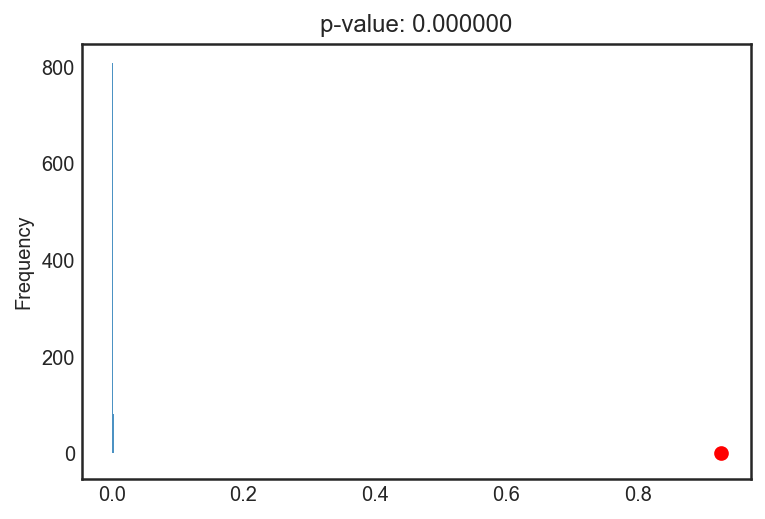

In [167]:
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

In [225]:
#Permutation test against bikeid

#BlueBikes
bluebikes_mcar = bluebikes.copy()

#BlueBikes
distr = (
    bluebikes_mcar
    .assign(is_null=bluebikes_mcar['birth year'] == 1969)
    .pivot_table(index='is_null', columns='bikeid', aggfunc='size')
    .apply(lambda x:x / x.sum(), axis=1)
)
distr

bikeid,1,3,4,5,7,8,9,10,11,12,...,4539,4540,4553,4558,4560,4561,4562,4565,4587,4606
is_null,,,,,,,,,,,,,,,,,,,,,
False,0.00012,0.000017,0.000089,0.000232,0.000021,0.000134,0.000245,0.000162,0.000172,0.000156,...,0.000037,0.000111,0.000097,0.000122,0.000054,0.000060,0.000109,0.000099,0.000024,6.539987e-07
True,0.00019,0.000018,0.000079,0.000305,0.000026,0.000243,0.000472,0.000216,0.000296,0.000260,...,0.000004,0.000040,0.000035,0.000057,0.000040,0.000035,0.000053,0.000040,0.000018,NaN


In [222]:


n_repetitions = 50

tvds = []
for _ in range(n_repetitions):
    
    # shuffle the gender column (testing to see if child missing depends on gender)
    shuffled_col = (
        bluebikes_mcar['bikeid']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        bluebikes_mcar
        .assign(**{
            'bikeid': shuffled_col,
            'is_null': bluebikes_mcar['birth year'] == 1969
        })
    )
    
    # compute the tvd
    shuffled = (
        shuffled
        .pivot_table(index='is_null', columns='bikeid', aggfunc='size')
        .apply(lambda x:x / x.sum(), axis=1)
    )
    
    tvd = shuffled.diff().iloc[-1].abs().sum() / 2
    # add it to the list of results
    
    tvds.append(tvd)

In [226]:
obs = distr.diff().iloc[-1].abs().sum() / 2
obs

0.11344177303639365

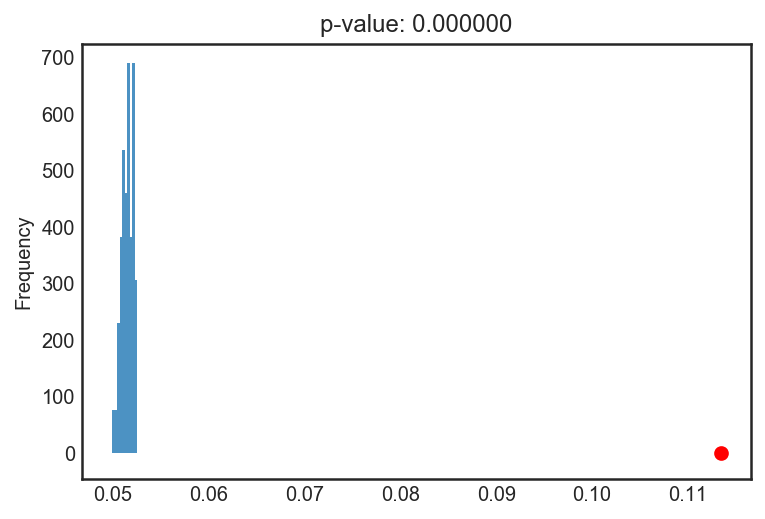

In [227]:
pval = np.mean(tvds > obs)
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

### Hypothesis Test
---

In [5]:
sample_size = len(bluebikes[bluebikes['birth year'] == 1969])

In [11]:
obs = bluebikes[bluebikes['birth year'] == 1969]['in college'].mean()

props = []

for i in np.arange(1000):
    random_sample = bluebikes.sample(int(sample_size), replace=False)
    prop = random_sample['in college'].mean()
    props.append(prop)
    
props = np.array(props)    

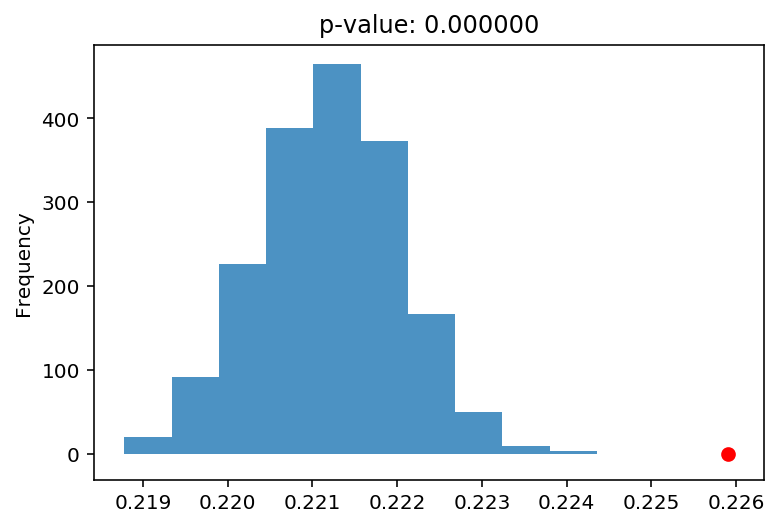

In [12]:
pval = np.mean(props > obs)
pd.Series(props).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plot.scatter(obs, 0, color='red', s=40);